In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Walmart.csv")

# Preview data
print(df.head())
print(df.info())
print(df.describe())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   i

In [3]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# Check for null values
print(df.isnull().sum())

# Check unique stores
print(df['Store'].nunique())


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
45


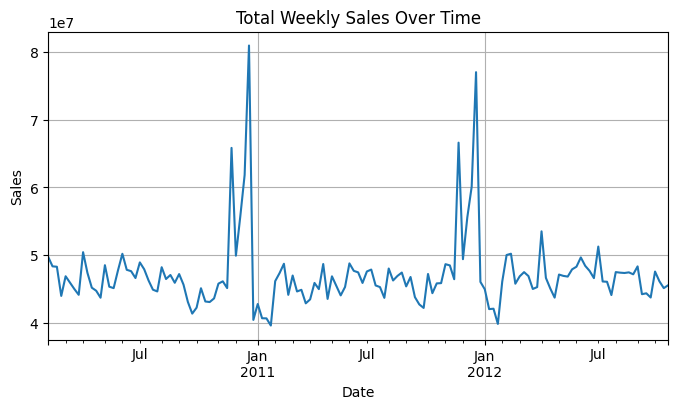

In [10]:
import matplotlib.pyplot as plt

# Aggregate sales over time
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum()

# Plot total weekly sales
plt.figure(figsize=(8,4))
sales_over_time.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


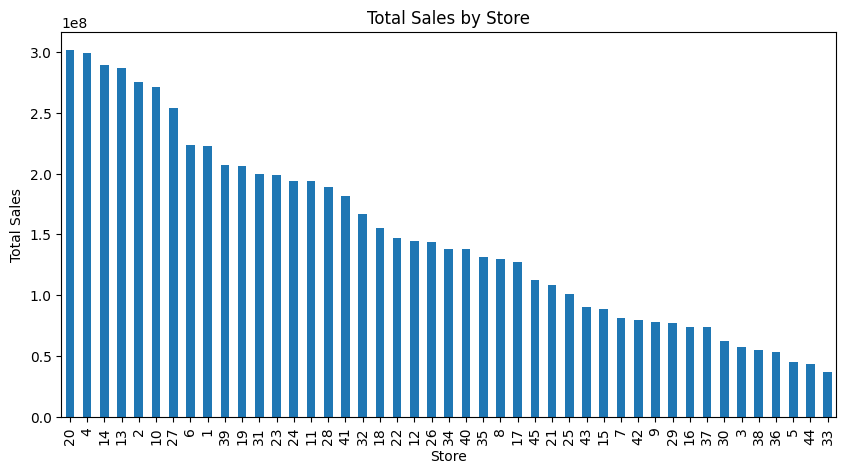

In [5]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Bar plot
store_sales.plot(kind='bar', figsize=(10,5), title='Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


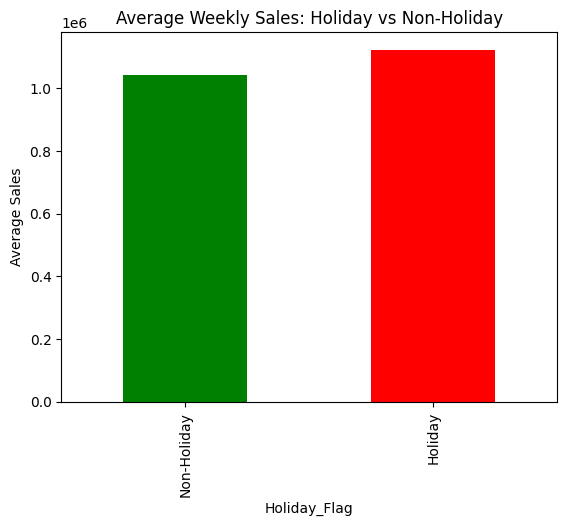

In [6]:
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

# 0 = Non-Holiday, 1 = Holiday
holiday_sales.plot(kind='bar', title='Average Weekly Sales: Holiday vs Non-Holiday', color=['green', 'red'])
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Average Sales')
plt.show()


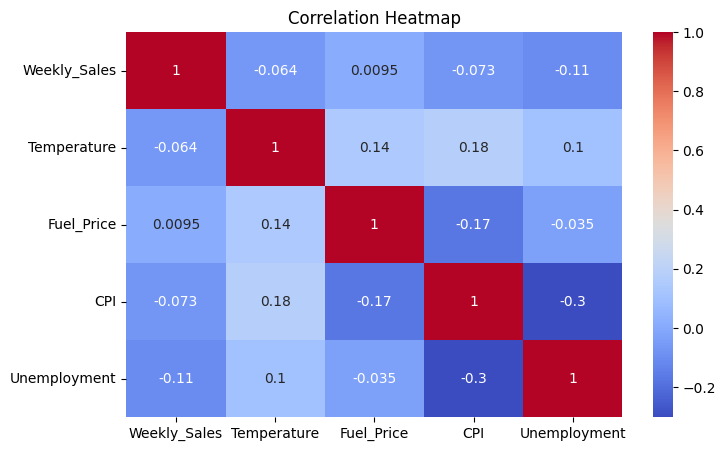

In [7]:
import seaborn as sns

# Select relevant columns
corr_data = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
corr = corr_data.corr()

# Heatmap
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
